In [1]:
import pandas as pd
import numpy as mp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
advert.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
advert.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

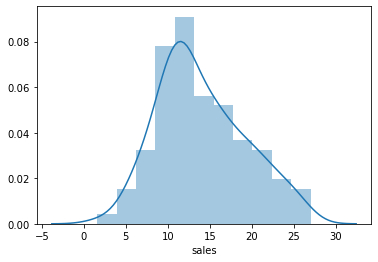

In [7]:
sns.distplot(advert.sales)

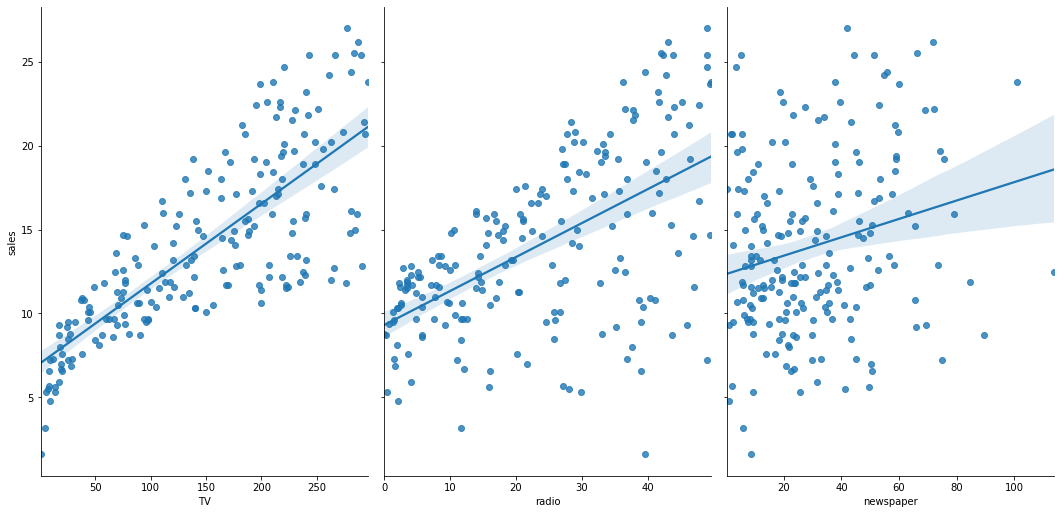

In [8]:
sns.pairplot(advert, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height = 7, aspect = 0.7, kind = 'reg')

In [9]:
advert.TV.corr(advert.sales)

0.7822244248616066

In [10]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


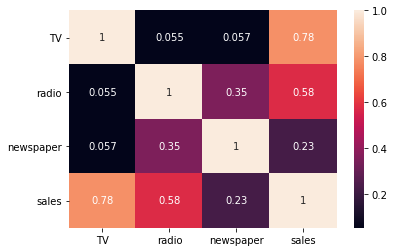

In [11]:
sns.heatmap(advert.corr(), annot = True)

In [12]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [14]:
y = advert.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 1)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [17]:
linReg = LinearRegression()

In [18]:
linReg.fit(X_train, Y_train)

LinearRegression()

In [19]:
y_pred = linReg.predict(X_test)

In [20]:
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

In [21]:
Y_test.head()

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64

In [22]:
accuracy = linReg.score(X_test, Y_test)
print(accuracy)

0.5590828580007852


# TheilSen Regressor

In [26]:
from sklearn.linear_model import  TheilSenRegressor
model = TheilSenRegressor()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.5511724899931381


# RANSACRegressor

In [28]:
from sklearn.linear_model import  RANSACRegressor
model = RANSACRegressor()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.5425637418977718


# HuberRegressor

In [29]:
from sklearn.linear_model import  HuberRegressor
model = HuberRegressor()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.55717948658439
